<h1> Simulator</h1>

In [313]:
import warnings
warnings.simplefilter('ignore')
#change path to git repo path
os.chdir('/home/niklasvm/Envs/Simulator/GBMGridSimulator/')

In [2]:
import os
from Simulator import *

INFO:keyring.backend:Loading KWallet
INFO:keyring.backend:Loading SecretService
INFO:keyring.backend:Loading Windows
INFO:keyring.backend:Loading chainer
INFO:keyring.backend:Loading macOS

WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



<h2> Setup a simulation</h2>

<p>Define the number of objects and the dimension of the spectrum matrix.</p>

In [150]:
n_objects=1
spectrumgrid=[1,1]
trigdat="rawdata/191017391/glg_trigdat_all_bn191017391_v01.fit"
simulation=Simulator(n_objects,spectrumgrid,trigdat)

<p>Choose between the Fibonacci and the better ModifiedFibonacci algorithm for source distribution and set boundaries for the spectrum parameters.</p>

In [151]:
simulation.setup(algorithm='Fibonacci',irange=[-1.6,-1],crange=[30,150],K=.05,background_function=Powerlaw(K=.01))

[[(0.05, 30., -1.6)]]


<h2>Convert from Fermi cartesian frame to ICRS angles</h2>

<p>You have to define a position for Fermi by giving a sample trigdat file</p>

In [152]:

simulation.generate_j2000()

<h2> Get detailed data about your Grid Points</h2>

In [14]:
mat=simulation.grid[0].spectrum_matrix[0,0]

<p>You can change your parameter boundaries afterwards while keeping everything else the same</p>

In [6]:
simulation.setup(algorithm='Fibonacci',irange=[-2.,-1.],crange=[100,200])

In [7]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [0.21373142977507384, -0.6814094774262411, 0.6999999999999998]
RA: 272d51m09.2161s 
DEC: -26d23m33.2985s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


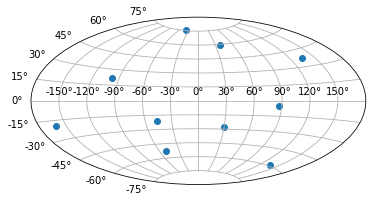

In [7]:
simulation.grid_plot()

<h2>Refining your Grid to get evener distribution</h2>

<p>Simulate physical points on the sphere and using coulomb repulsion to find distribution that maximises distance between all points.</p>

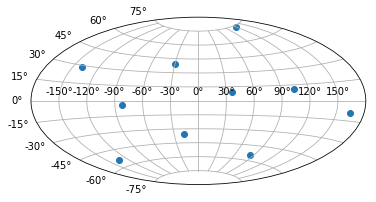

In [7]:
simulation.coulomb_refining(1000)
simulation.generate_j2000(trigdat)
simulation.grid_plot()

<p> As you can see we got a significantly better distribution...</p>

In [13]:
simulation.grid[11].show()

GBM Cartesian Coordinates: [ 0.19620562 -0.70983501  0.67648919]
RA: 274d20m21.0933s 
DEC: -24d28m32.8414s


,0,1,2,3
0,Index=-2.0 Energy=300.0,Index=-2.0 Energy=533.33,Index=-2.0 Energy=766.66,Index=-2.0 Energy=1000.0
1,Index=-1.667 Energy=300.,Index=-1.667 Energy=533.,Index=-1.667 Energy=766.,Index=-1.667 Energy=1000
2,Index=-1.333 Energy=300.,Index=-1.333 Energy=533.,Index=-1.333 Energy=766.,Index=-1.333 Energy=1000
3,Index=-1.0 Energy=300.0,Index=-1.0 Energy=533.33,Index=-1.0 Energy=766.66,Index=-1.0 Energy=1000.0


<p>... while keeping the spectrum matrix. So no need to recalculate this again.</p>
<p>If you are not happy with your distribution you can always refine it even more with coulomb_refining and maybe a larger step number</p>

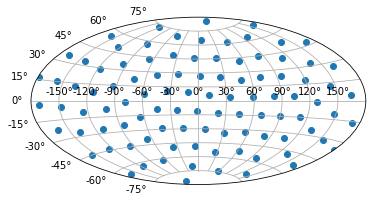

In [14]:
simulation.coulomb_refining(10)
simulation.generate_j2000(trigdat)
simulation.grid_plot()
simulation.grid[11].show()

In [13]:
os.getcwd()
os.chdir('rawdata/191017391/')

<h2>Get Photon Count Spectra</h2>

<p>Until now we only have mathematical models how the spectra should look. But we need photon count spectra because that is what GBM measures. We also need to consider that each detector has a specific influence on the measured photon spectrum, depending on the energy of the photons and the direction where the photons are coming from. This information ist stored in a Detector Response Matrix (DRM).</p>
<p>For every GridPoint (Source) we have to calculate the DRMs for every detector and use them to get a physically reasonable photon spectrum. All of this is done by the following function:</p>

In [153]:
simulation.generate_DRM_spectrum()

<p>As you can see we get a threeML InstrumentResponse for each detector</p>

In [14]:
simulation.grid[1].response

{'b0': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f187681ccd0>,
 'b1': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f187681ce10>,
 'n0': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f1876828590>,
 'n1': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18768284d0>,
 'n2': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba990>,
 'n3': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba410>,
 'n4': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba6d0>,
 'n5': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f189ceba910>,
 'n6': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18768dc850>,
 'n7': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18768dca50>,
 'n8': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f1876845c50>,
 'n9': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f1876845f10>,
 'na': <threeML.utils.OGIP.response.InstrumentResponse at 0x7f18767e9c90>,
 'nb': <threeML.utils.OGI

<p>And we can plot the response and the count spectrum for each simulated sample spectrum. The entries correspond to the ones in the spectrum matrix.<p>

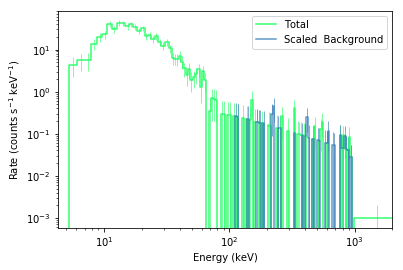

In [154]:
simulation.grid[0].photon_counts['n3'][0,0].view_count_spectrum();


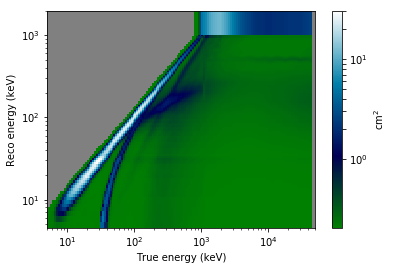

In [13]:
simulation.grid[5].photon_counts['n7'][1,2].display_rsp()

In [38]:
simulation.grid[0].photon_counts['n0'][0,0]

n. channels                    128
total rate                  897154
total bkg. rate                429
bkg. exposure                    1
bkg. is poisson               True
exposure                         1
is poisson                    True
background                profiled
significance               1112.16
src/bkg area ratio               1
src/bkg exposure ratio           1
src/bkg scale factor             1
response                      None

In [128]:
point=simulation.grid[0]

In [211]:
point.spectrum_matrix[0,0]

* description: A power law multiplied by an exponential cutoff
  * formula: $ K~\frac{x}{piv}^{index}~\exp{-x/xc} $
  * parameters:
    * K:
      * value: 0.1
      * desc: Normalization (differential flux at the pivot value)
      * min_value: 1.0e-30
      * max_value: 1000.0
      * unit: keV-1 s-1 cm-2
      * is_normalization: true
      * delta: 0.1
      * free: true
    * piv:
      * value: 100.0
      * desc: Pivot value
      * min_value: null
      * max_value: null
      * unit: keV
      * is_normalization: false
      * delta: 0.1
      * free: false
    * index:
      * value: -1.6
      * desc: Photon index
      * min_value: -10.0
      * max_value: 10.0
      * unit: ''
      * is_normalization: false
      * delta: 0.2
      * free: true
    * xc:
      * value: 29.999999999999996
      * desc: Cutoff energy
      * min_value: null
      * max_value: null
      * unit: keV
      * is_normalization: false
      * delta: 1.0
      * free: true

In [205]:
model=Model(PointSource('test',ra=point.ra,dec=point.dec,spectral_shape=Cutoff_powerlaw()))
model.test.spectrum.main.Cutoff_powerlaw.xc.min_value=1e-3
model.test.spectrum.main.Cutoff_powerlaw.xc.max_value=1e2

In [173]:
dat=DataList(simulation.grid[0].photon_counts['n0'][0,0],simulation.grid[0].photon_counts['n1'][0,0],simulation.grid[0].photon_counts['n2'][0,0])

In [233]:
jl=JointLikelihood(model,dat)

In [158]:
result=jl.fit()

Best fit values:



,result,unit
parameter,,
test.spectrum.main.Cutoff_powerlaw.K,(9.0 -1.9 +2.4) x 10,1 / (cm2 keV s)
test.spectrum.main.Cutoff_powerlaw.index,-1.59 +/- 0.12,
test.spectrum.main.Cutoff_powerlaw.xc,(2.53 -0.32 +0.4) x 10,keV



Correlation matrix:



1.00,-0.98,0.86
-0.98,1.00,-0.94
0.86,-0.94,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
n0,223.762343
n1,203.755849
n2,175.095684
total,602.613876



Values of statistical measures:



,statistical measures
AIC,1211.290911
BIC,1223.079681


In [92]:
model=Model(PointSource('test',ra=point.ra,dec=point.dec,spectral_shape=Cutoff_powerlaw(K=49.94,index=-1.5997,xc=49.97)))

In [412]:
jl=JointLikelihood(model,dat,verbose=True)

In [366]:
multinest_minimizer=GlobalMinimization("multinest")
local_minimizer=LocalMinimization("scipy")
multinest_minimizer.setup(second_minimization=local_minimizer,live_points=800)
jl.set_minimizer(multinest_minimizer)

In [413]:
result=jl.fit(n_samples=20000)

trial values: 2.1522,-2.935 -> logL = -150.602
trial values: 2.1527,-2.935 -> logL = -150.602
trial values: 2.1518,-2.935 -> logL = -150.602
trial values: 2.1534,-2.935 -> logL = -150.602
trial values: 2.1511,-2.935 -> logL = -150.602
trial values: 2.1522,-2.9344 -> logL = -150.602
trial values: 2.1522,-2.9356 -> logL = -150.602
trial values: 2.1522,-2.9342 -> logL = -150.602
trial values: 2.1522,-2.9359 -> logL = -150.602
trial values: 2.1522,-2.935 -> logL = -150.602
trial values: 2.1522,-2.935 -> logL = -150.602
trial values: 2.1522,-2.935 -> logL = -150.602
trial values: 2.1522,-2.9351 -> logL = -150.602
trial values: 2.1522,-2.935 -> logL = -150.602
trial values: 2.1534,-2.935 -> logL = -150.602
trial values: 2.1511,-2.935 -> logL = -150.602
trial values: 2.1522,-2.9342 -> logL = -150.602
trial values: 2.1522,-2.9359 -> logL = -150.602
trial values: 2.1522,-2.935 -> logL = -150.602
trial values: 2.1534,-2.935 -> logL = -150.602
trial values: 2.1511,-2.935 -> logL = -150.602
trial 

Best fit values:



,result,unit
parameter,,
test.spectrum.main.Powerlaw.K,(1.4 -1.1 +5) x 10^2,1 / (cm2 keV s)
test.spectrum.main.Powerlaw.index,-2.9 +/- 0.5,



Correlation matrix:



1.00,-0.98
-0.98,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
n0,150.601762
total,150.601762



Values of statistical measures:



,statistical measures
AIC,305.299524
BIC,310.907584


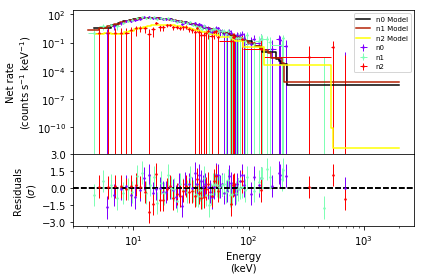

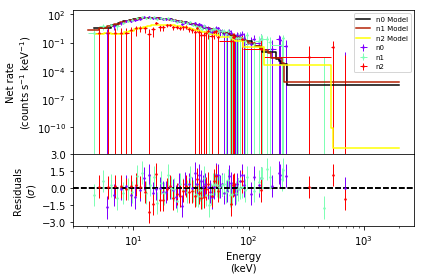

In [159]:
display_spectrum_model_counts(jl)

In [536]:
model.free_parameters

OrderedDict([('test.spectrum.main.Cutoff_powerlaw.K',
              Parameter K = 1.0 [1 / (cm2 keV s)]
              (min_value = 1e-30, max_value = 1000.0, delta = 0.1, free = True)),
             ('test.spectrum.main.Cutoff_powerlaw.index',
              Parameter index = -2.0 []
              (min_value = -10.0, max_value = 10.0, delta = 0.2, free = True)),
             ('test.spectrum.main.Cutoff_powerlaw.xc',
              Parameter xc = 10.0 [keV]
              (min_value = None, max_value = None, delta = 1.0, free = True))])

Single Spectrum

In [553]:
spectrum=Cutoff_powerlaw(K=100.,xc=40.)

In [554]:
os.chdir('/home/niklasvm/Envs/Simulator/GBMGridSimulator/')    

det_list=['n0','n1','n2','n3','n4','n5','n6','n7','n8','n9','na','nb','b0','b1']
det_rsp=dict()
trigger="131229277"
os.chdir('rawdata/131229277/')

for det in det_list:
    rsp = drm.DRMGenTTE(tte_file=glob('glg_tte_'+det+'_bn'+trigger+'_v0*.fit.gz')[0],trigdat=glob('glg_trigdat_all_bn'+trigger+'_v0*.fit')[0],mat_type=2,cspecfile=glob('glg_cspec_'+det+'_bn'+trigger+'_v0*.pha')[0])
    det_rsp[det] = rsp

os.chdir('/home/niklasvm/Envs/Simulator/GBMGridSimulator/')


In [555]:
response=dict()
for det in det_list:
    response[det]=det_rsp[det].to_3ML_response(ra=20,dec=10)
    

In [556]:
photon_counts=dict()
for det in det_list:
    photon_counts[det]=DispersionSpectrumLike.from_function(det,source_function=spectrum,background_function=Powerlaw(K=1),response=response[det])

In [557]:
model=Model(PointSource('test',ra=20.,dec=10.,spectral_shape=Cutoff_powerlaw()))

In [558]:
dat=DataList(photon_counts['n1'],photon_counts['n2'],photon_counts['n9'],photon_counts['na'])

In [559]:
jl=JointLikelihood(model,dat)

In [561]:
result=jl.fit(n_samples=30000)

Best fit values:



,result,unit
parameter,,
test.spectrum.main.Cutoff_powerlaw.K,(5.6 -0.8 +0.9) x 10,1 / (cm2 keV s)
test.spectrum.main.Cutoff_powerlaw.index,-1.71 +/- 0.06,
test.spectrum.main.Cutoff_powerlaw.xc,(2.57 -0.22 +0.25) x 10,keV



Correlation matrix:



1.00,-0.88,0.17
-0.88,1.00,-0.59
0.17,-0.59,1.00



Values of -log(likelihood) at the minimum:



,-log(likelihood)
n1,200.173359
n2,179.380142
n9,171.393680
na,203.516277
total,754.463458



Values of statistical measures:



,statistical measures
AIC,1514.97416
BIC,1527.64189


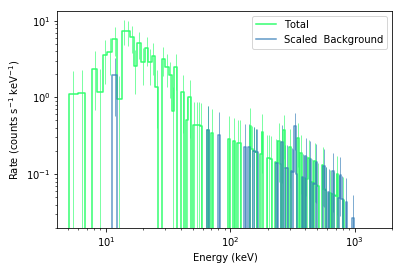

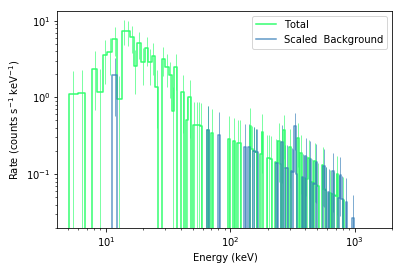

In [528]:
photon_counts['n1'].view_count_spectrum()

In [102]:
jl=JointLikelihood(model,dat)

In [237]:
os.chdir('/home/niklasvm/')

In [548]:
for det in det_list:
    print(det+": "+str(photon_counts[det].significance))

n0: 9.310865819359279
n1: 16.363116157536254
n2: 15.533081256893407
n3: -0.1796091960184265
n4: 0.08671140545842132
n5: -0.6164670244619587
n6: 0.4834562702026995
n7: 0.6164670244619587
n8: 0.2705143029805329
n9: 15.60720709015354
na: 15.854404830872385
nb: 1.904821337851433
b0: -0.18898725892789084
b1: -1.1151694739980809


In [328]:
from glob import glob

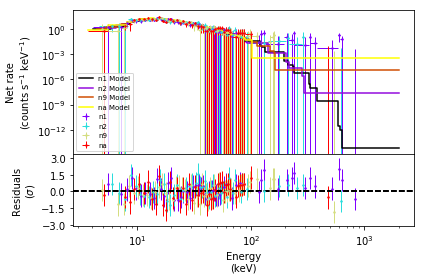

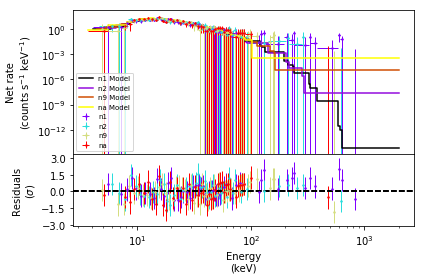

In [552]:
display_spectrum_model_counts(jl)